<a href="https://colab.research.google.com/github/oimartin/460/blob/main/hw4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import numpy as np
import random
import pandas as pd
from statistics import stdev
from matplotlib import pyplot as plt
import seaborn as sns

# Question 1
Monte Carlo simulation: points in a circle

## Part a

In [21]:
# determine points inside or outside the quarter circle
# r = 1
def inside_a_circle (x,y):

  # points inside the circle
  if x**2 + y**2 < 1:
    return 1
  
  # points outside the circle
  elif x**2 + y**2 >= 1:
    return 0

## Part b

In [24]:
# func to estimate pi, standard error
def estimate_pi (N):
  
  # set up variables
  xy_points = []

  # loop through N pairs
  for i in range(0,N):
    x = np.random.uniform(0,1)
    y = np.random.uniform(0,1)

    result = inside_a_circle(x,y)

    # update list of xy_points
    xy_points.append(result)

  # estimate of pi for N pairs 
  pi_est = 4*sum(xy_points) / len(xy_points)

  # standard error of points inside quarter circle
  standard_error = stdev(xy_points)

  # standard error of pi
  pi_se = standard_error * 4

  # confidence interval 
  ci_95 = (1.96*pi_se/ np.sqrt(len(xy_points)))

  return pi_est, pi_se, ci_95

## Part C

In [25]:
# Prepare variable lists
N = []
pi_estimate = []
pi_standard_error = []
confidence_int_95 = []
pi_upper = []
pi_lower = []
interval = []

# iterate in increments of 500
for i in range(1000, 10500, 500):

  # add current increment to N pairs list
  N.append(i)

  # perform metrics for N pairs
  pi_est, pi_se, ci_95 = estimate_pi(i)
  pi_estimate.append(pi_est)
  pi_standard_error.append(pi_se)
  confidence_int_95.append(ci_95)

  # caclulate additional metrics for pi estimation
  pi_upper.append(pi_est + ci_95)
  pi_lower.append(pi_est - ci_95)
  interval.append(ci_95*2)

# create dictionary of lists
df = {'N': N,
      'estimate': pi_estimate,
      'se': pi_standard_error,
      'upper': pi_upper,
      'lower': pi_lower,
      'interval': interval}

# convert dictionary to df
pd.DataFrame(df)

,N,estimate,se,upper,lower,interval
0,1000,3.136000,1.646881,3.238075,3.033925,0.204149
1,1500,3.152000,1.635445,3.234765,3.069235,0.165530
2,2000,3.142000,1.642311,3.213977,3.070023,0.143955
3,2500,3.180800,1.614545,3.244090,3.117510,0.126580
4,3000,3.118667,1.658162,3.178003,3.059330,0.118673
5,3500,3.126857,1.652566,3.181607,3.072108,0.109499
6,4000,3.139000,1.644188,3.189954,3.088046,0.101908
7,4500,3.094222,1.674306,3.143142,3.045302,0.097840
8,5000,3.141600,1.642343,3.187123,3.096077,0.091047
9,5500,3.133818,1.647711,3.177365,3.090271,0.087093


## Part d

In [28]:
pi_est_4000 = []

for i in range(0,501):
  pi_est, pi_se, ci_95 = estimate_pi(4000)
  pi_est_4000.append(pi_est)

In [38]:
pi_est_series = pd.Series(pi_est_4000)

Text(0.5, 1.0, 'Estimating pi with 4000 points, 500 times')

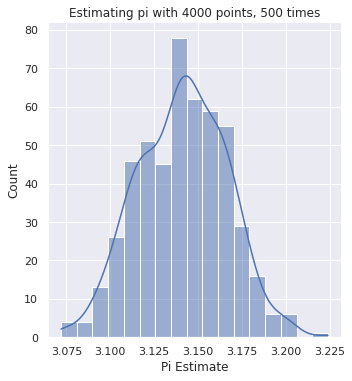

In [49]:
sns.set_theme(style='darkgrid')
g = sns.displot(data=pi_est_series, kde=True)
g.set_axis_labels('Pi Estimate')
plt.title('Estimating pi with 4000 points, 500 times')

In [51]:
print(f'The standard deviation is {stdev(pi_est_4000)}')

The standard deviation is 0.025112707537028312


In [60]:
within_interval = 0

for i in pi_est_4000:
  if i <= 3.189954:
    within_interval += 1
  if i >= 3.088046:
    within_interval += 1

print(f'''There are {within_interval} pi estimates within the 95% CI interval.
{round(within_interval/len(pi_est_4000), 2)}% is the percentage of pi estimates within the 95% CI interval.''')

There are 982 pi estimates within the 95% CI interval.
1.96% is the percentage of pi estimates within the 95% CI interval.


# Question 2
Simulation: selling bikes and making bonus on bike sales

In [ ]:
# determine number of bikes sold
possible_bikes = [4,5,6,7,8]
bikes_sold = random.choices(possible_bikes, weights=(0.4, 0.35, 0.45, 0.15, 0.05))[0]
bikes_sold

# Set up variables
day_bonus = 0
model_A = 0
model_B = 0
model_C = 0
model_D = 0

# Determine bonus made if sold more than 4 bikes
if bikes_sold > 4:

  # iterate over the number of bikes to determine model and bonus
  for k in range(1,bikes_sold):

    # Generate random probability to pick a bike model
    bike_type = np.random.uniform(0,1)

    # Model A Bike
    if bike_type < 0.4:
      bonus = 10
      day_bonus += bonus
      model_A += 1

    # Model B Bike
    elif bike_type < 0.75:
      bonus = 15
      day_bonus += bonus
      model_B += 1

    # Model C Bike
    elif bike_type < 0.95:
      bonus = 20
      day_bonus += bonus
      model_C += 1

    # Model D Bike
    else:
      sold = 25
      day_bonus += bonus
      model_D += 1

  # Potential bonus made
  print(f'''The salesperson sold {bikes_sold} bikes, and made ${day_bonus} in bonus money.

The salesperson sold the following bikes: 
  {model_A} model A bikes
  {model_B} model B bikes
  {model_C} model C bikes
  {model_C} model D bikes''')

# If less than 4 bikes were sold, no bonus
elif bikes_sold <= 4:
  print(f'The salesperson sold 4 or less bikes and did not get a bonus.')


The salesperson sold 5 bikes, and made $70 in bonus money.

The salesperson sold the following bikes: 
  0 model A bikes
  2 model B bikes
  2 model C bikes
  2 model D bikes


# Practice

In [ ]:
demand = 32

N = 100
dayprofit = []

for k in range(1,N):
  ordered = demand
  soldRN = np.random.uniform(0,1)
  if soldRN < 0.05:
    sold = 30
  elif soldRN < 0.2:
    sold = 31
  elif soldRN < 0.42:
    sold = 32
  elif soldRN < 0.8:
    sold = 33
  elif soldRN < 0.94:
    sold = 34
  else:
    sold = 35

  demand = sold
  dayprofit.append(min(sold,ordered)*0.1 - abs(sold-ordered)*0.1)

endbalance = sum(dayprofit)/N
print(endbalance)


2.9899999999999975
